### 79 LOF (local outlier factor)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
df = pd.DataFrame({'x1': np.concatenate((np.random.randn(40),np.random.randn(40)+5)),
                   'x2': np.concatenate((np.random.randn(40),np.random.randn(40)+10))})
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [4]:
lof = LocalOutlierFactor(n_neighbors=20)
data = df.values
y_pred = lof.fit_predict(data) # -1 means outlier
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
df['lof'] = y_pred
df

,x1,x2,lof
0,0.496714,-0.219672,1
1,-0.138264,0.357113,1
2,0.647689,1.477894,1
3,1.523030,-0.518270,1
4,-0.234153,-0.808494,1
...,...,...,...
75,5.821903,9.285649,1
76,5.087047,11.865775,1
77,4.700993,10.473833,1
78,5.091761,8.808697,1


### 80 outlier distribution

In [7]:
df['lof'].value_counts()

 1    77
-1     3
Name: lof, dtype: int64

In [9]:
df.query('lof==-1')

,x1,x2,lof
20,1.465649,-1.415371,-1
26,-1.150994,1.886186,-1
33,-1.057711,2.463242,-1


### 81 isolation forest

In [11]:
from sklearn.ensemble import IsolationForest
np.random.seed(42)
df.drop(['lof'], axis=1, inplace=True)
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [13]:
outlier = IsolationForest(n_estimators=50, contamination=0.05, random_state=42)
outlier.fit(df)
df['outlier_flag'] = outlier.predict(df)
df['outlier_flag'].value_counts()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    76
-1     4
Name: outlier_flag, dtype: int64

### 82 visualization

<AxesSubplot:xlabel='x1', ylabel='x2'>

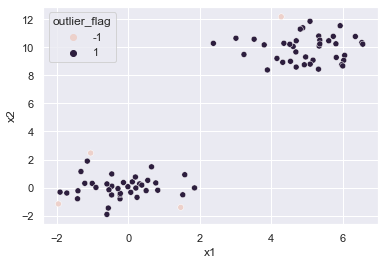

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
df['outlier_flag'].value_counts()

sns.set()
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['outlier_flag'])